In [29]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import pickle

In [22]:
df = pd.read_csv('../data/btcusd-history-price.csv', delimiter=';', parse_dates=['time_period_end'], usecols=['rate_close', 'time_period_end'])
df.columns = ['ds', 'y']
df["ds"] = pd.to_datetime(df["ds"]).dt.strftime('%Y-%m-%d %H:%M:%S')
df

,ds,y
0,2016-01-01 00:30:00,432.079724
1,2016-01-01 01:00:00,430.831630
2,2016-01-01 01:30:00,429.972772
3,2016-01-01 02:00:00,430.378803
4,2016-01-01 02:30:00,431.095165
...,...,...
1483,2016-01-31 22:00:00,377.445938
1484,2016-01-31 22:30:00,378.114000
1485,2016-01-31 23:00:00,374.591562
1486,2016-01-31 23:30:00,369.815078


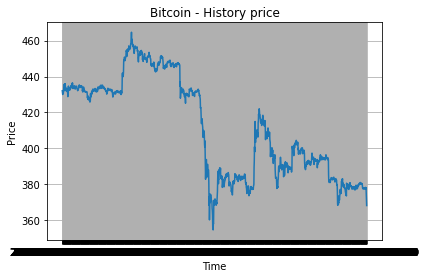

<Figure size 3600x1440 with 0 Axes>

In [25]:
plt.title('Bitcoin - History price')
plt.plot(df['ds'], df['y'])
plt.xlabel('Time')
plt.grid(True)
plt.ylabel('Price')
plt.figure(figsize=(50, 20))
plt.show()

In [3]:
m = Prophet()
m.fit(df)

22:41:52 - cmdstanpy - INFO - Chain [1] start processing
22:41:54 - cmdstanpy - INFO - Chain [1] done processing


In [38]:
with open('prophet.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(m, f, pickle.HIGHEST_PROTOCOL)


In [37]:
with open('prophet.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    pickled = pickle.load(f)


In [32]:
future = pickled.make_future_dataframe(periods=1, freq='30min')
future

,ds
0,2016-01-01 00:30:00
1,2016-01-01 01:00:00
2,2016-01-01 01:30:00
3,2016-01-01 02:00:00
4,2016-01-01 02:30:00
...,...
1484,2016-01-31 22:30:00
1485,2016-01-31 23:00:00
1486,2016-01-31 23:30:00
1487,2016-02-01 00:00:00


In [33]:
forecast = pickled.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]


,ds,yhat,yhat_lower,yhat_upper
0,2016-01-01 00:30:00,435.343424,429.573384,441.035223
1,2016-01-01 01:00:00,435.156904,430.339232,440.923773
2,2016-01-01 01:30:00,435.006738,429.636672,441.035760
3,2016-01-01 02:00:00,434.890791,429.393045,440.669380
4,2016-01-01 02:30:00,434.795024,429.404440,440.535470
...,...,...,...,...
1484,2016-01-31 22:30:00,380.388997,374.899421,385.518332
1485,2016-01-31 23:00:00,380.317007,374.962131,385.522795
1486,2016-01-31 23:30:00,380.201574,374.629418,385.916086
1487,2016-02-01 00:00:00,380.068695,374.788059,385.886050


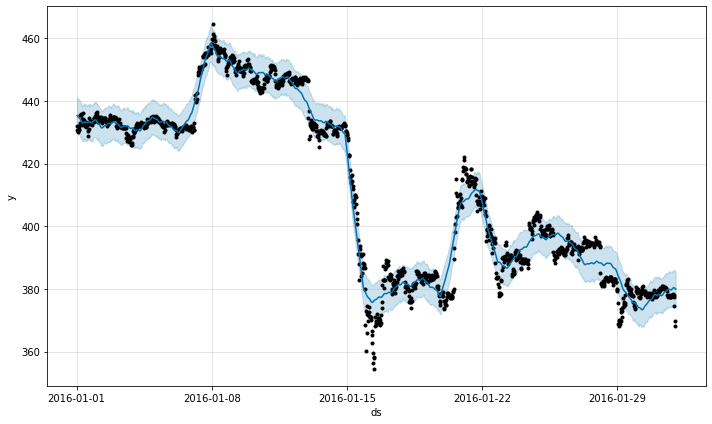

In [34]:
fig1 = pickled.plot(forecast)

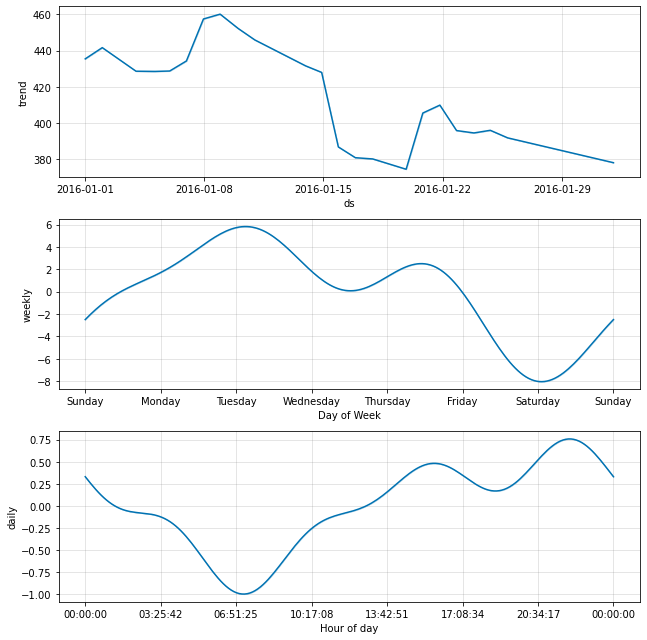

In [35]:
fig2 = m.plot_components(forecast)
